<h1>Setup</h1>

In [73]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.models import load_model

import numpy as np
from matplotlib import pyplot as plt

import os

In [41]:
# OPTIONAL: Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [42]:
tf.config.list_physical_devices('GPU')

[]

<h1>Load Data</h1>

In [44]:
# Get all of the images from the 3 files
data = tf.keras.utils.image_dataset_from_directory('data')

Found 6167 files belonging to 2 classes.


In [45]:
# Access the class names
class_names = data.class_names
print(class_names)

['Dementia', 'NonDementia']


In [46]:
# Turn the files into numpy iterators for their batches (loop through baches now)
# Shuffles them as well
data_iterator = data.as_numpy_iterator()

In [47]:
# Get next batch of image
# Batch is a tuple of (image (32, height, width, channel), label)
batch = data_iterator.next()

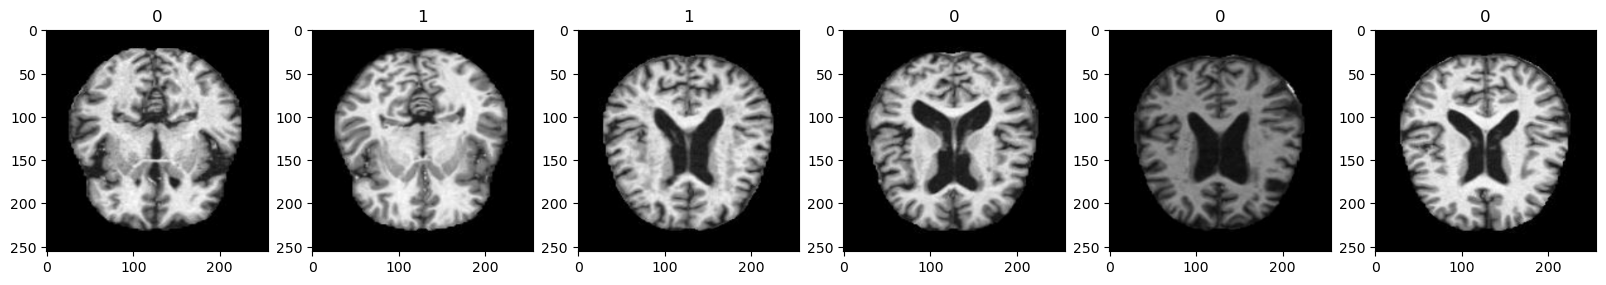

In [48]:
fig, ax = plt.subplots(ncols=6, figsize=(20,20))
for idx, img in enumerate(batch[0][:6]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

<h1>Scaling</h1>

In [49]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()

<h1>Split Data and Train</h1>

In [51]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [52]:
train_size

135

In [53]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [54]:
model = Sequential()

In [55]:
# CNN with ReLU activations (256,256,3 input shape for the start (what each image is))
model.add(Conv2D(32, (3,3), strides=1, activation='relu', input_shape=(256,256,3)))
# Max pooling cuts the output size in half
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), strides=1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3,3), strides=1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(256, (3,3), strides=1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
# Dense layer to yield 256 Neurons
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [56]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [57]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │    12,845,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,233,985 (50.48 MB)

 Trainable params: 13,233,985 (50.48 MB)

 Non-trainable params: 0 (0.00 B)

In [58]:
logdir='logs'

In [59]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [60]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 63s 451ms/step - accuracy: 0.5286 - loss: 0.7770 - val_accuracy: 0.5271 - val_loss: 0.6768
Epoch 2/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 47s 344ms/step - accuracy: 0.6392 - loss: 0.6402 - val_accuracy: 0.7278 - val_loss: 0.5589
Epoch 3/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 47s 349ms/step - accuracy: 0.7130 - loss: 0.5745 - val_accuracy: 0.7278 - val_loss: 0.5190
Epoch 4/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 47s 348ms/step - accuracy: 0.7407 - loss: 0.5153 - val_accuracy: 0.8232 - val_loss: 0.3925
Epoch 5/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 47s 349ms/step - accuracy: 0.8182 - loss: 0.3896 - val_accuracy: 0.8577 - val_loss: 0.3093
Epoch 6/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 47s 350ms/step - accuracy: 0.9081 - loss: 0.2353 - val_accuracy: 0.8717 - val_loss: 0.2900
Epoch 7/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 48s 356ms/step - accuracy: 0.9486 - loss: 0.1421 - val_accuracy: 0.9375 - val_loss: 0.1517
Epoch 8/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 48s 352ms/step - accuracy: 0.9692 - loss: 0

<h1>Evaluate Performance</h1>

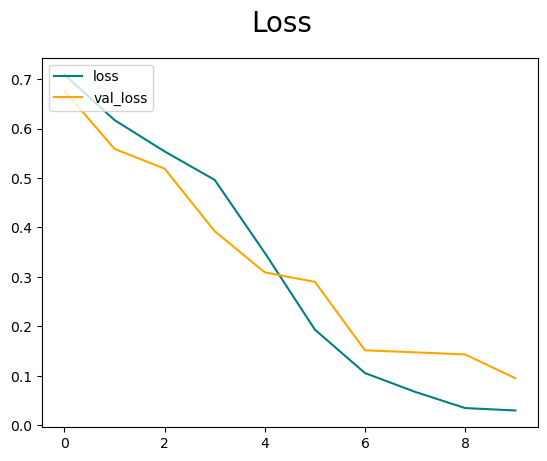

In [61]:
# Loss Plot
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

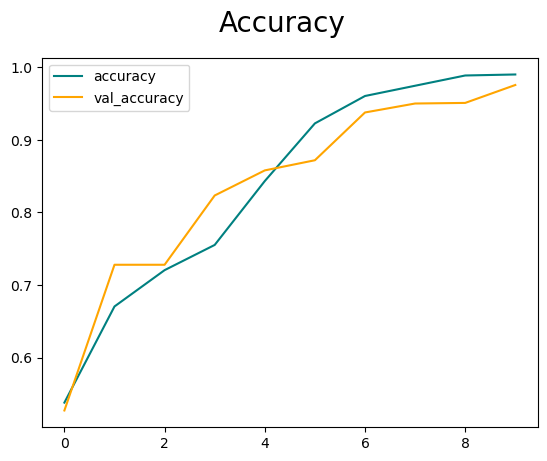

In [62]:
# Accuracy Plot
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [63]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [64]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


In [65]:
print(f"Precision: {pre.result().numpy():.4f}, Recall: {re.result().numpy():.4f}, Accuracy: {acc.result().numpy():.4f}")

Precision: 0.9644, Recall: 0.9371, Accuracy: 0.9490


<h1>Saving the Model</h1>

In [72]:
model.save(os.path.join('models','alzheimers_classifier.keras'))